<a href="https://colab.research.google.com/github/claraferreirabatista/processo_seletivo/blob/main/Leads_Analisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANDO OS DADOS

# Contagem de cada tipo Campanha

In [1]:
from google.colab import files
uploaded = files.upload()


Saving leads_gerados.csv to leads_gerados (1).csv
Saving verba.csv to verba (1).csv


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
leads_gerados = pd.read_csv('leads_gerados.csv')

In [4]:

leads_gerados_copy = leads_gerados.copy()
leads_gerados_copy['Data'] = pd.to_datetime(leads_gerados_copy['Data'], format='%d/%m/%Y')

for month in range(1, 6):
    filtered_data = leads_gerados_copy[(leads_gerados_copy['Data'].dt.month == month) &
                                       ((leads_gerados_copy['Campanha'] == 'ebook') |
                                        (leads_gerados_copy['Campanha'] == 'campanha-cupom') |
                                        (leads_gerados_copy['Campanha'] == 'campanha-institucional') |
                                        (leads_gerados_copy['Campanha'] == 'webinar'))]

    count_ebook = filtered_data[filtered_data['Campanha'] == 'ebook'].shape[0]
    count_cupom = filtered_data[filtered_data['Campanha'] == 'campanha-cupom'].shape[0]
    count_institucional = filtered_data[filtered_data['Campanha'] == 'campanha-institucional'].shape[0]
    count_webinar = filtered_data[filtered_data['Campanha'] == 'webinar'].shape[0]

    print(f"Mês: {month}")
    print(f"Campanha 'ebook': {count_ebook} leads")
    print(f"Campanha 'campanha-cupom': {count_cupom} leads")
    print(f"Campanha 'campanha-institucional': {count_institucional} leads")
    print(f"Campanha 'webinar': {count_webinar} leads")
    print("-" * 50)


Mês: 1
Campanha 'ebook': 21 leads
Campanha 'campanha-cupom': 28 leads
Campanha 'campanha-institucional': 19 leads
Campanha 'webinar': 17 leads
--------------------------------------------------
Mês: 2
Campanha 'ebook': 19 leads
Campanha 'campanha-cupom': 26 leads
Campanha 'campanha-institucional': 19 leads
Campanha 'webinar': 16 leads
--------------------------------------------------
Mês: 3
Campanha 'ebook': 21 leads
Campanha 'campanha-cupom': 23 leads
Campanha 'campanha-institucional': 21 leads
Campanha 'webinar': 19 leads
--------------------------------------------------
Mês: 4
Campanha 'ebook': 19 leads
Campanha 'campanha-cupom': 19 leads
Campanha 'campanha-institucional': 14 leads
Campanha 'webinar': 20 leads
--------------------------------------------------
Mês: 5
Campanha 'ebook': 20 leads
Campanha 'campanha-cupom': 27 leads
Campanha 'campanha-institucional': 21 leads
Campanha 'webinar': 16 leads
--------------------------------------------------


# Visualização da tabela Verba

In [5]:
verba = pd.read_csv('verba.csv')



### **Qual campanha gerou o CPL (Custo por Lead) mais baixo? Para conseguir calcular o CPL você deve terminar de preencher a aba "Verba" da planilha.**

In [6]:
leads_gerados_copy = leads_gerados.copy()

leads_gerados_copy['Data'] = pd.to_datetime(leads_gerados_copy['Data'], format='%d/%m/%Y')

meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio']
campanhas = ['ebook', 'campanha-cupom', 'campanha-institucional', 'webinar']
leads_por_mes_campanha = {mes: {campanha: 0 for campanha in campanhas} for mes in meses}

for month_idx, mes in enumerate(meses, start=1):
    for campanha in campanhas:
        filtered_data = leads_gerados_copy[(leads_gerados_copy['Data'].dt.month == month_idx) &
                                           (leads_gerados_copy['Campanha'] == campanha)]

        count_leads = filtered_data.shape[0]
        leads_por_mes_campanha[mes][campanha] = count_leads

for idx, row in verba.iterrows():
    mes = row['Período']
    campanha = row['Campanha']
    verba.at[idx, 'Leads gerados'] = leads_por_mes_campanha[mes][campanha]

verba['Leads gerados'] = verba['Leads gerados'].astype(int)


# Novos dados inseridos na tabela Verba

In [7]:
for i in range(len(verba['Leads gerados'])):
    investimento_total = float(verba['Investimento total'][i].replace('R$', '').replace('.', '').replace(',', '.'))
    leads_gerados = verba['Leads gerados'][i]
    cpl = investimento_total / leads_gerados

    verba['CPL\nCusto por Lead'][i] = f"R$ {cpl:.2f}".replace('.', ',')
verba.rename(columns={'CPL\nCusto por Lead': 'CPL'}, inplace=True)


In [8]:
leads_gerados

16

# Qual campanha gerou o CPL (Custo por Lead) mais baixo?

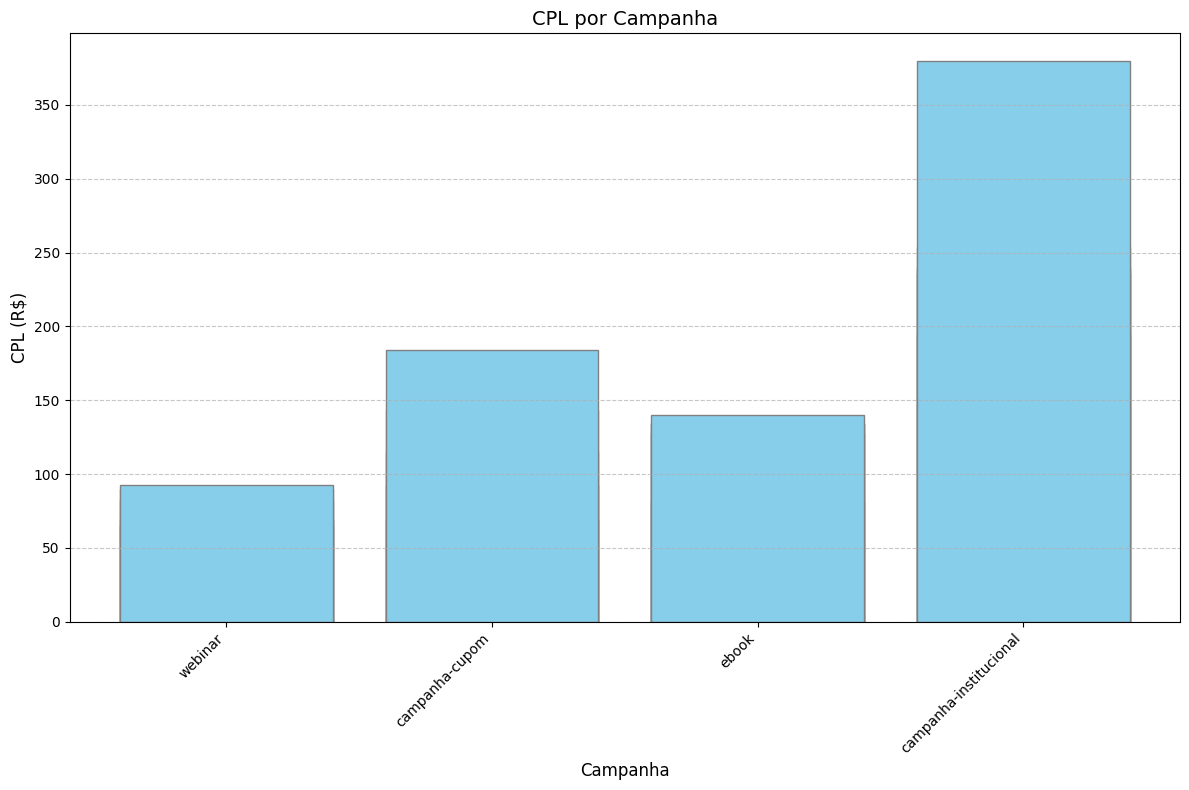

A campanha que gerou o CPL mais baixo foi 'webinar' com CPL de R$ 65.04.


In [9]:

verba_copy = verba.copy()
verba_copy['CPL'] = verba_copy['CPL'].apply(lambda x: float(x.replace('R$ ', '').replace(',', '.')))
verba_sorted = verba_copy.sort_values(by='CPL', ascending=True)
plt.figure(figsize=(12, 8))
bars = plt.bar(verba_sorted['Campanha'], verba_sorted['CPL'], color='skyblue', edgecolor='gray')
plt.xlabel('Campanha', fontsize=12)
plt.ylabel('CPL (R$)', fontsize=12)
plt.title('CPL por Campanha', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

campanha_mais_baixo = verba_copy.loc[verba_copy['CPL'].idxmin(), 'Campanha']
cpl_mais_baixo = verba_copy.loc[verba_copy['CPL'].idxmin(), 'CPL']

print(f"A campanha que gerou o CPL mais baixo foi '{campanha_mais_baixo}' com CPL de R$ {cpl_mais_baixo:.2f}.")


# Tem alguma campanha que está gerando volume alto de leads, porém com qualificação baixa? Qual?

In [10]:

cpl_medio_por_campanha = verba_copy.groupby('Campanha')['CPL'].mean()
print("CPL médio por campanha:")
for campanha, cpl in cpl_medio_por_campanha.items():
    print(f"- {campanha}: R$ {cpl:.2f}")
print()
campanha_alta_leads_baixa_qualificacao = cpl_medio_por_campanha.idxmax()
cpl_maximo = cpl_medio_por_campanha.max()
print(f"A campanha com potencial alto volume de leads e possivelmente baixa qualificação é \n '{campanha_alta_leads_baixa_qualificacao}' com CPL médio de aproximadamente R$ {cpl_maximo:.2f}.")


CPL médio por campanha:
- campanha-cupom: R$ 120.80
- campanha-institucional: R$ 260.97
- ebook: R$ 123.43
- webinar: R$ 79.98

A campanha com potencial alto volume de leads e possivelmente baixa qualificação é 
 'campanha-institucional' com CPL médio de aproximadamente R$ 260.97.


# O cliente pediu para desligarmos a campanha “campanha-institucional” sem uma justificativa baseada em dados, apenas porque ele "cansou" dessa campanha. Investigue se essa campanha tem performance, ou não, para ser desligada. A performance está diretamente ligada à qualidade dos leads gerados por ela.

In [11]:
media_cpl_por_campanha = verba_copy.groupby('Campanha')['CPL'].mean().reset_index()
media_cpl_por_campanha.columns = ['Campanha', 'CPL Médio']
media_cpl_por_campanha['CPL Médio'] = media_cpl_por_campanha['CPL Médio'].apply(lambda x: f'R$ {x:.2f}')

media_cpl_por_campanha


,Campanha,CPL Médio
0,campanha-cupom,R$ 120.80
1,campanha-institucional,R$ 260.97
2,ebook,R$ 123.43
3,webinar,R$ 79.98


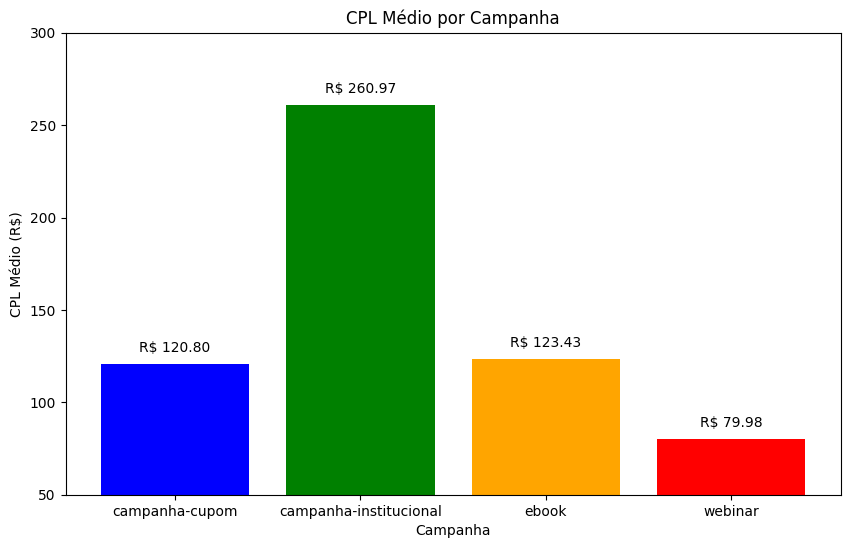

In [12]:
data = {
    'Campanha': ['campanha-cupom', 'campanha-institucional', 'ebook', 'webinar'],
    'CPL Médio': [120.80, 260.97, 123.43, 79.98]
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))

bars = plt.bar(df['Campanha'], df['CPL Médio'], color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Campanha')
plt.ylabel('CPL Médio (R$)')
plt.title('CPL Médio por Campanha')

plt.ylim(50, 300)
for bar, valor in zip(bars, df['CPL Médio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'R$ {valor:.2f}', ha='center', va='bottom')
plt.show()
